In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#1задание

df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#2задание

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#3 Задание

In [9]:
df_matrix = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_matrix.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


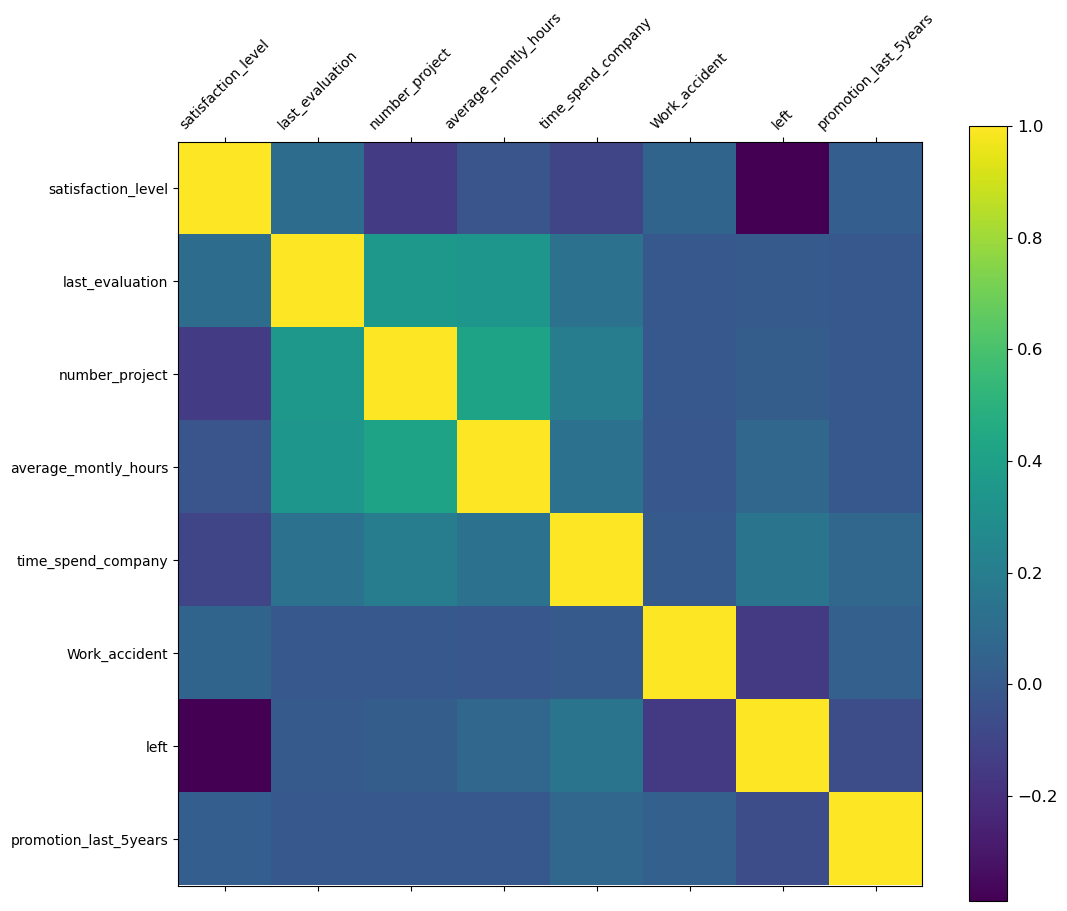

In [10]:
f = plt.figure(figsize=(12, 10))
plt.matshow(df_matrix.corr(), fignum=f.number)
plt.xticks(range(df_matrix.shape[1]), df_matrix.columns, fontsize=10, rotation=45)
plt.yticks(range(df_matrix.shape[1]), df_matrix.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

In [12]:
#Самые скоррелированные: average_montly_hours и number_project last_evaluation и number_project

#Менее скоррелированные: left и satisfaction_level left и Work_accident

In [13]:
#4 Задание

In [14]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

In [15]:
#5 Задание

In [16]:
df.groupby('salary')['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

<Axes: ylabel='salary'>

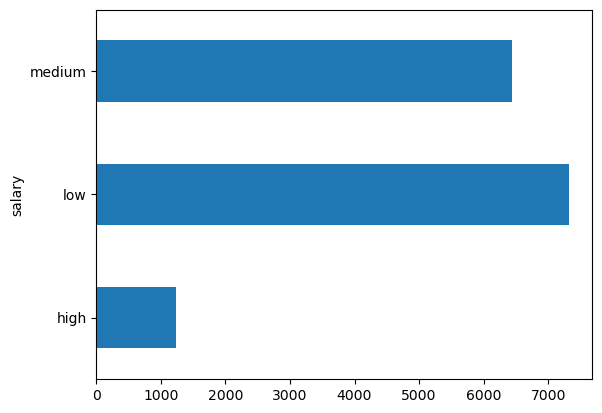

In [17]:
df.groupby('salary')['salary'].count().plot(kind="barh")

In [18]:
df_sal = df.groupby([df['department'],df['salary']])[['salary']].count()
df_sal

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

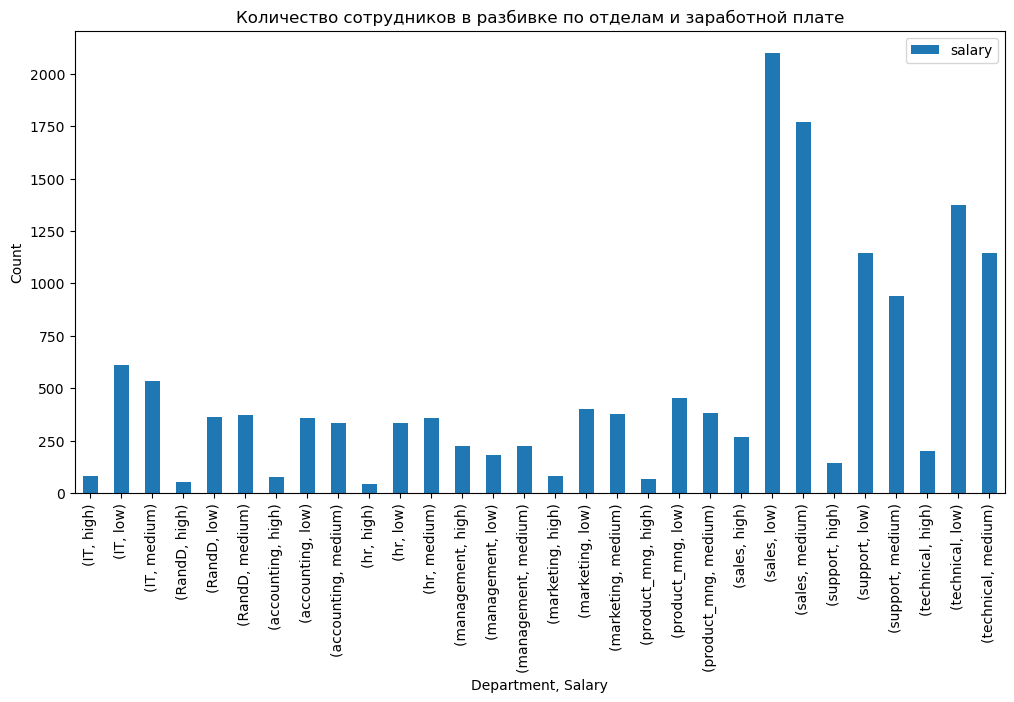

In [19]:
df_sal.plot(kind='bar', figsize=(12,6))
plt.xlabel('Department, Salary')
plt.ylabel('Count')
plt.title('Количество сотрудников в разбивке по отделам и заработной плате')
plt.show()

In [20]:
#7 задание

In [21]:
df_hours = df.groupby([df['salary']])[['average_montly_hours']].count()
df_hours

,average_montly_hours
salary,
high,1237
low,7316
medium,6446


In [22]:
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

In [23]:
print("Среднее количество часов работы в месяц для сотрудников с высоким окладом:", high_salary['average_montly_hours'].mean())
print("Среднее количество часов работы в месяц для сотрудников с низким окладом:", low_salary['average_montly_hours'].mean())

Среднее количество часов работы в месяц для сотрудников с высоким окладом: 199.86742118027485
Среднее количество часов работы в месяц для сотрудников с низким окладом: 200.9965828321487


In [24]:
t_stat, p_value = stats.ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'])
print("t-статистика:", t_stat)
print("p-value:", p_value)

t-статистика: -0.7288680398062308
p-value: 0.4661023478267259


In [25]:
#отвергаем нулевую гипотезу, уровень оклада не влияет на рабочее время

In [26]:
#8 задание

In [27]:
left = df[df['left'] == 1]
not_left = df[df['left'] == 0]

In [28]:
left_promoted_rate=len(left.loc[left['promotion_last_5years'] == 1])/len(left)
not_left_promoted_rate=len(not_left.loc[not_left['promotion_last_5years'] == 1])/len(not_left)
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся:", left_promoted_rate)
print("Доля сотрудников с повышением за последние 5 лет среди не уволившихся:", not_left_promoted_rate)

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005320638476617194
Доля сотрудников с повышением за последние 5 лет среди не уволившихся: 0.026251312565628283


In [29]:
left_satisfaction_level = left['satisfaction_level'].mean()
not_left_satisfaction_level = not_left['satisfaction_level'].mean()
print("Средняя степень удовлетворенности уволившихся сотрудников:", left_satisfaction_level)
print("Средняя степень удовлетворенности не уволившихся сотрудников:", not_left_satisfaction_level)

Средняя степень удовлетворенности уволившихся сотрудников: 0.4400980117614114
Средняя степень удовлетворенности не уволившихся сотрудников: 0.666809590479524


In [39]:
left_avg_projects = left['number_project'].mean()
not_left_avg_projects = not_left['number_project'].mean()
print("Среднее количество проектов уволившихся сотрудников:", left_avg_projects)
print("Среднее количество проектов не уволившихся сотрудников:", not_left_avg_projects)

Среднее количество проектов уволившихся сотрудников: 3.8555026603192384
Среднее количество проектов не уволившихся сотрудников: 3.786664333216661


In [31]:
#1.
Доля сотрудников с повышением за последние 5 лет среди уволившихся ниже, чем среди не уволившихся. Вероятно, это один из факторов, влияющих на увольнение.
#2. Средняя степень удовлетворенности также ниже у уволившихся сотрудников, что может свидетельствовать о недовольстве условиями работы.
#3. Уволившиеся сотрудники в среднем имели больше проектов, чем оставшиеся. Это может указывать на перегрузку работой как одну из причин увольнения.

In [32]:
#9 задание
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [37]:
y_pred = lda.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7533333333333333


In [ ]:
#В данном случае точность 0.75 говорит о том, что 75% предсказаний модели являются правильными. 